# IMDb Data Analysis

In the following document we will take a look into the IMDb, the Image Movie Database, probably the largest collection of information related to movies, television shows and games. The IMDb is currently owned by Amazon, has ~75 million users and is on Alexa Rank 55 (April 2017). It was founded 17th October 1990 (26 years ago!).

The IMDb provides a dump of the data in list format, which can be downloaded from imdb.com/interfaces

## Extraction

First we need to be able to extract the data from the database in a meaningful way. The unusual List structure of the data is quite a big obstacle here. Additionally there are a lot of inconsistencies in the data that must be accounted for.

Therefore I wrote a helper module which handles the extraction part. It is - due to time limitation - quite limited in function, but correctly parses the supported lists which then can be combined for further analysis.

See below somge examples for inconsistent data.

In [1]:
# Example with ratings list
with open("../../database/selection/ratings.list", 'r') as f:
    for num, line in enumerate(f):
        if num > 300000 and num <= 300005:
            print(line)
        elif num > 600000 and num <= 600005:
            print(line)
        elif num > 600010:
            break

      ....1.1402      17   8.1  "The Phil Silvers Show" (1955) {Bilko and the Flying Saucers (#3.14)}

      ....0.16.0      11   7.7  "The Phil Silvers Show" (1955) {Bilko and the Medium (#4.14)}

      ....2.251.      10   7.3  "The Phil Silvers Show" (1955) {Bilko at Bay (#3.12)}

      ....0033.1      14   7.6  "The Phil Silvers Show" (1955) {Bilko in Outer Space (#4.34)}

      ....0.1502      18   8.2  "The Phil Silvers Show" (1955) {Bilko on Wall Street (#1.34)}

      ..1.1.1111       6   7.0  Queen of the Desert (2013) (TV)

      0000121000    5278   5.6  Queen of the Desert (2015)

      ...0131012      20   7.3  Queen of the East (1995) (TV)

      .01...1.14      16   7.5  Queen of the Gypsies (2004)

      1121100.00      41   4.0  Queen of the Jungle (1935/I)



In [2]:
# Example with technicals list
with open("../../database/selection/business.list", 'r') as f:
    for num, line in enumerate(f):
        if num > 30000 and num <= 30020:
            print(line)
        elif num > 30020:
            break

PD: November 1934 - December 1934 



-------------------------------------------------------------------------------

MV: Werewolf of London (1935)



BT: USD 195,393 



CP: Universal Pictures Corp; 14 May 1935; LP5543 

CP: copyright MCMXXXV Universal Pictures Corp. (on print) 



PD: 28 January 1935 - 23 February 1935 



-------------------------------------------------------------------------------

MV: West Point of the Air (1935)



CP: Copyright MCMXXXV in U.S.A. by Metro-Goldwyn-Mayer Corporation (on print); © Metro-Goldwyn-Mayer Corp.; 11 March 1935; LP5432 (in copyright registry) 



PD: November 1934 - 7 January 1935 



-------------------------------------------------------------------------------



In [3]:
# Example with technicals list

with open("../../database/selection/technical.list", 'r') as f:
    for num, line in enumerate(f):
        if num > 700000 and num <= 700010:
            print(line)
        elif num > 700010:
            break

Catalyst (2009/II)					RAT:1.85 : 1

Catalyst (2014/I)					CAM:Canon 5D MKII

Catalyst (2014/I)					RAT:2.35 : 1

Catalyst (2016/I)					RAT:16:9 HD

Catalyst for a Separation (2014)			CAM:Nikon D300

Catalyst for a Separation (2014)			RAT:16 : 9

Catania (1912)						MET:107 m

Catania (1912)						OFM:35 mm

Catania (1912)						PCS:Spherical

Catania (1912)						PFM:35 mm



In [4]:
import re

with open("../../database/selection/technical.list", 'r') as f:
    for line in f:
        match = re.search(r'(.*)MET:(.*) m m', line)
        if match:
            print(match.group(0))
            break

A Lady of Chance (1928)					MET:2172.92 m m


## Intialization

At the beginnigs we need to import some libraries for extracting the information from the IMDb and plotting our findings.

In [5]:
import extract
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Ratings analysis

First let's get the average rating of all movies, of all movies with more than 1500 votes and all movies with more than 25000 votes, just to get a feeling for the ratings in the database. 

The number of **1500 is arbitrary**. The amount of **25000 votes is used by the IMDb itself** as a restriction for any movie to be able enter the "TOP 250 Movies" list.

In [6]:
# Define variables
ratings_sum = 0
ratings_100_sum = 0
ratings_25000_sum = 0

amount = 0
amount_100 = 0
amount_25000 = 0

In [7]:
ratings_list = []  # Save ratings in list for future use.

for movie in extract.get_ratings("../../database/selection/ratings.list"):
    if movie[1][0] > 25000:
        ratings_25000_sum += movie[1][1]
        amount_25000 += 1
    if movie[1][0] > 100:
        ratings_100_sum += movie[1][1]
        amount_100 += 1
        ratings_list.append(movie)
    
    ratings_sum += movie[1][1]
    amount += 1
    
print("Average rating: {0:46}. Number of movies: {1}".format(ratings_sum/amount, amount))
print("Average rating (restricted to >100 votes): {0:19}. Number of movies: {1}".format(ratings_100_sum/amount_100, amount_100))
print("Average rating (restricted to >25000 votes): {0}. Number of movies: {1}".format(ratings_25000_sum/amount_25000, amount_25000))

Average rating:                              6.945003113709419. Number of movies: 729034
Average rating (restricted to >100 votes):   6.814976524940843. Number of movies: 159957
Average rating (restricted to >25000 votes): 6.917053087757299. Number of movies: 4615


We can see that the **average** over all entries is around ~**6.945**. There are **729,034 entries** in the list.

If we restrict the movies to movies which at least recieved 100 votes, the total number of movies drops significantly to _159,957_. The rating falls to _~6.815_ this indicates that on average less voted movies get a higher score.

If we restrict even further, the average rating increases again, to 6.917, while the total amount of movies drops again to merely 4615 movies.

On a sidenote: Let's see the 10 most voted for movies

In [8]:
ratings_list.sort(key=lambda x: x[1][0], reverse=True)
for nr, movie in enumerate(ratings_list[:10]):
    print("{0:2}: {1}".format(nr+1, movie[0].title))

 1: The Shawshank Redemption
 2: The Dark Knight
 3: Inception
 4: Fight Club
 5: Pulp Fiction
 6: Forrest Gump
 7: The Lord of the Rings: The Fellowship of the Ring
 8: The Matrix
 9: The Lord of the Rings: The Return of the King
10: The Godfather


### Plotting time

Let's see a plot of Ratings vs Number of Votes. Also interesting is the number of movies per rating.

The third plot explores if there is a relationship between release year of the movie and rating.

In [9]:
ratings = [movie[1][1] for movie in ratings_list]
votes = [movie[1][0] for movie in ratings_list]
years = [movie[0].year for movie in ratings_list]

In [10]:
# Create figure
fig = plt.figure(figsize=(20, 20), dpi=100)
gs = gridspec.GridSpec(3, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])
ax4 = fig.add_subplot(gs[2, :])

In [11]:
# Create first plot
ax1.scatter(x=ratings, y=votes, alpha=0.1)
ax1.set_xlabel("Ratings")
ax1.set_ylabel("Votes")
ax1.set_title("Movie Ratings vs Number of Votes");

In [12]:
# Create second plot
ax2.hist(ratings)
ax2.set_xlabel("Ratings")
ax2.set_ylabel("Number of Movies")
ax2.set_title("Movie Ratings vs Number of Movies");

In [13]:
# Create third plot
sum_per_year = collections.defaultdict(int)
movies_per_year = collections.defaultdict(int)
for movie in ratings_list:
    if movie[0].year:
        sum_per_year[movie[0].year] += movie[1][1]
        movies_per_year[movie[0].year] += 1

In [14]:
avg_list = [(year, ratings_sum/movies_per_year[year]) for year, ratings_sum in sum_per_year.items()]
yrs, avg_ratings = zip(*avg_list)

ax3.scatter(x=years, y=ratings, alpha=0.1)
ax3.scatter(x=yrs, y=avg_ratings)
ax3.set_ylim([0, 10])
ax3.set_xlabel("Year")
ax3.set_ylabel("Average Rating")
ax3.set_title("Average Movie Rating per Year vs Release Year");

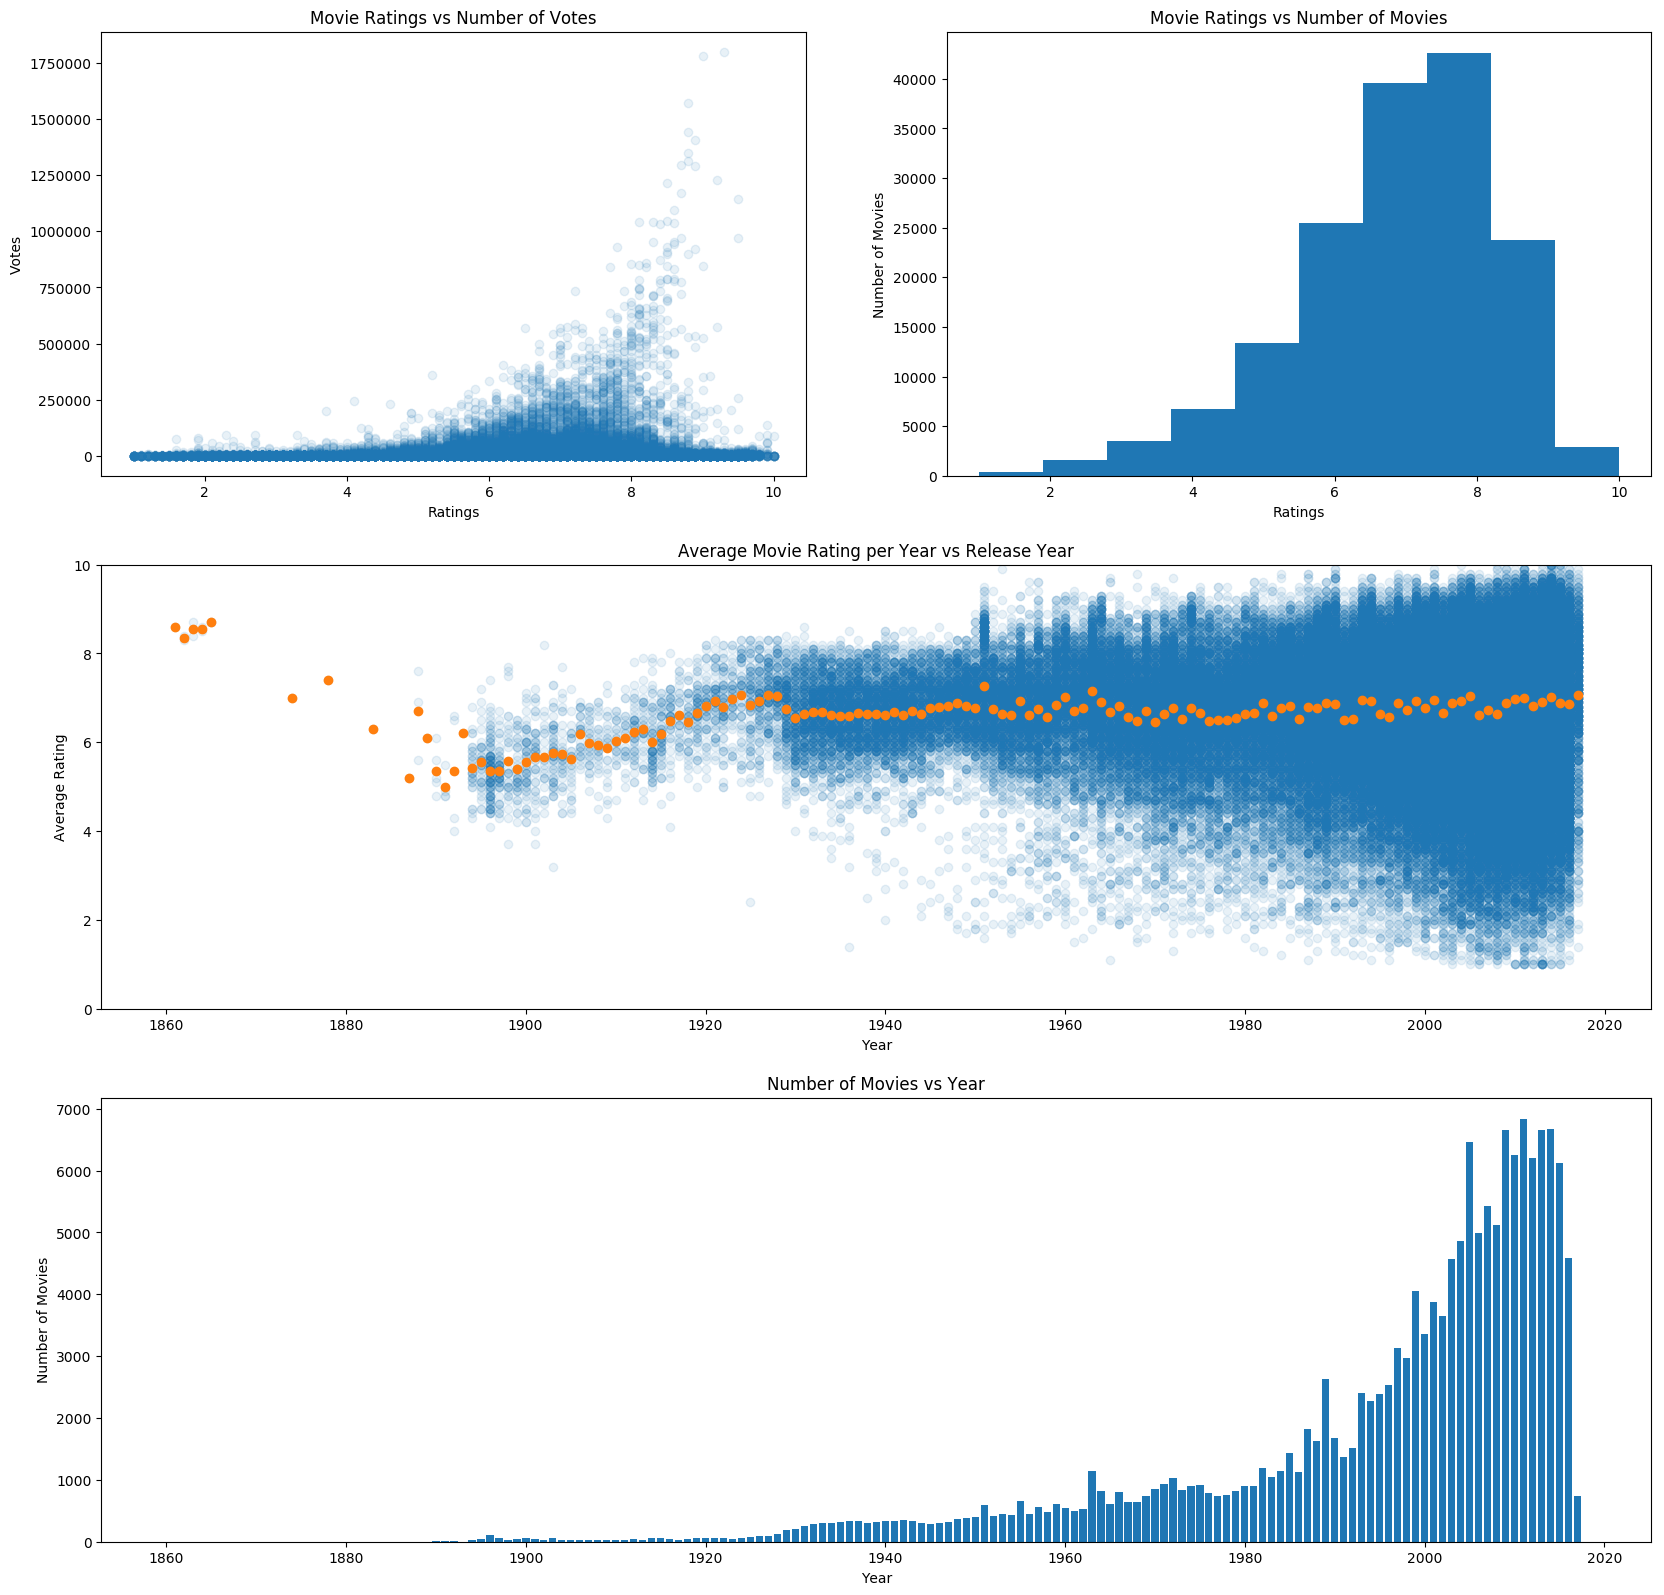

In [15]:
# Create forth plot
ax4.bar(list(movies_per_year.keys()), list(movies_per_year.values()))
ax4.set_xlabel("Year")
ax4.set_ylabel("Number of Movies")
ax4.set_title("Number of Movies vs Year")

# Show plot
fig

## Scatterplots

Let's look at some scatterplots now to see if there's a relationship between these values:

  - Duration vs Rating
  - Budget vs Rating
  - Duration vs Length
  - Genre vs Rating

### First Duration vs. Length

In [16]:
duration_gen = extract.get_running_times("../../database/selection/running-times.list")
technical_gen = extract.get_technicals("../../database/selection/technical.list")

# Combine both lists
combined = extract.combine_generator(duration_gen, technical_gen)

In [17]:
# Extract lengths and duration
lengths = []
durations = []
for data in combined.values():
    if data[1].met and data[1].met[0] is not '':
        length = sorted(data[1].met)[-1]
        duration = sorted(data[0])[-1]

        if "-" in length:
            length = length.split("-")[1]  # If there's a range specified, take the longer
        
        length = float(length)
        duration = float(duration)
        
        if length == 0:
            continue
            
        lengths.append(length)
        durations.append(duration)

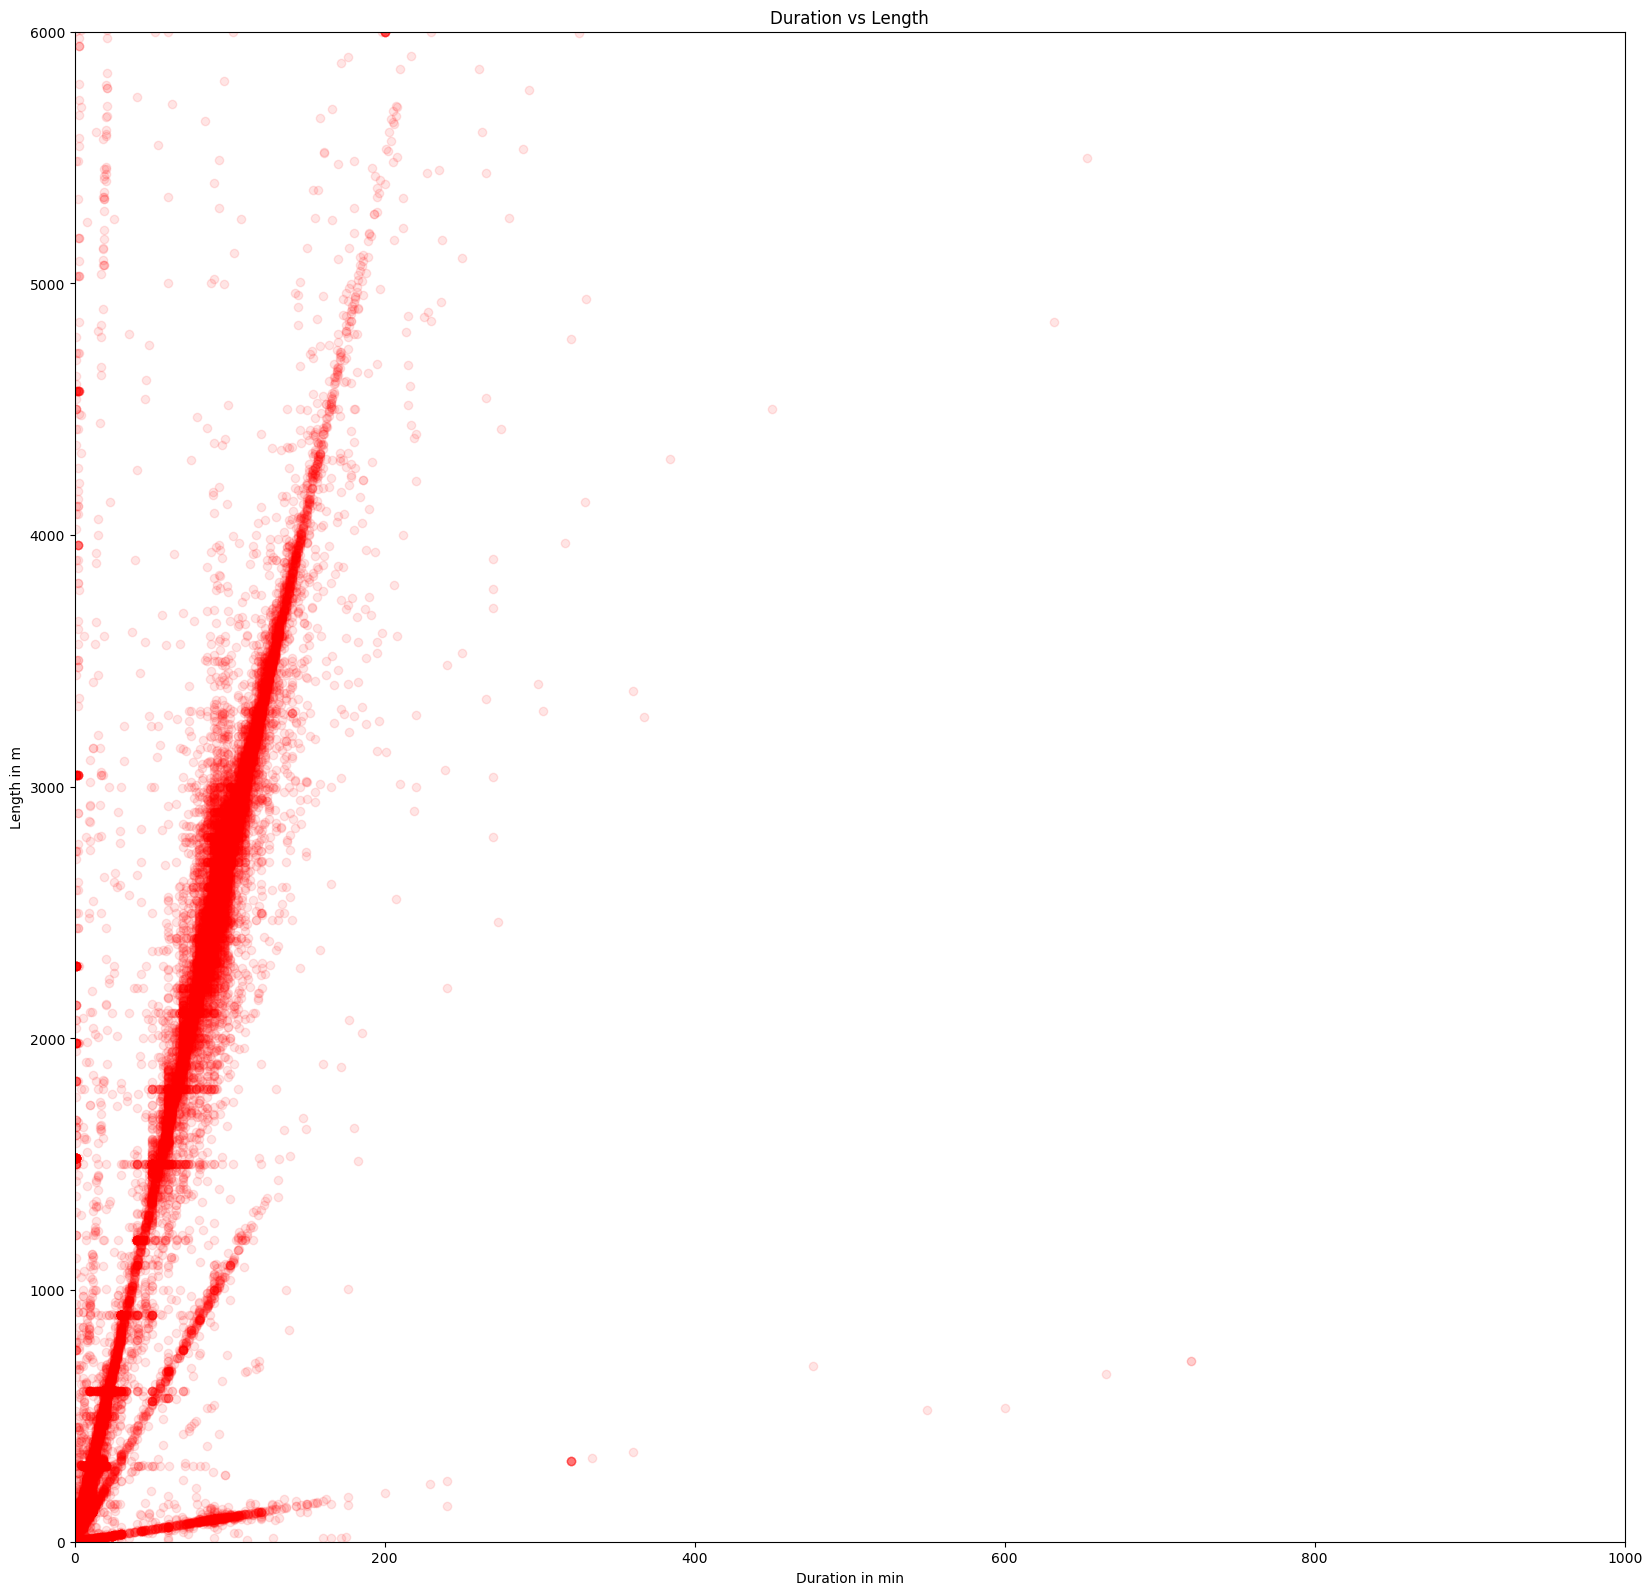

In [18]:
fig = plt.figure(figsize=(20, 20), dpi=100)
ax = fig.add_subplot(111)
ax.set_xlim(0, 1000)
ax.set_ylim(0, 6000)
ax.scatter(x=durations, y=lengths, alpha=0.1, c='red')
ax.set_xlabel("Duration in min")
ax.set_ylabel("Length in m")
ax.set_title("Duration vs Length")
fig

### Duration vs Rating

In [19]:
duration_gen = extract.get_running_times("../../database/selection/running-times.list")
rating_gen = extract.get_ratings("../../database/selection/ratings.list")

# Combine both lists
combined = extract.combine_generator(duration_gen, rating_gen)

In [20]:
durations = []
ratings = []
for data in combined.values():
    if data[1][0] > 100:
        durations.append(float(sorted(data[0])[-1]))  # Take the longest duration and convert to float
        ratings.append(data[1][1])

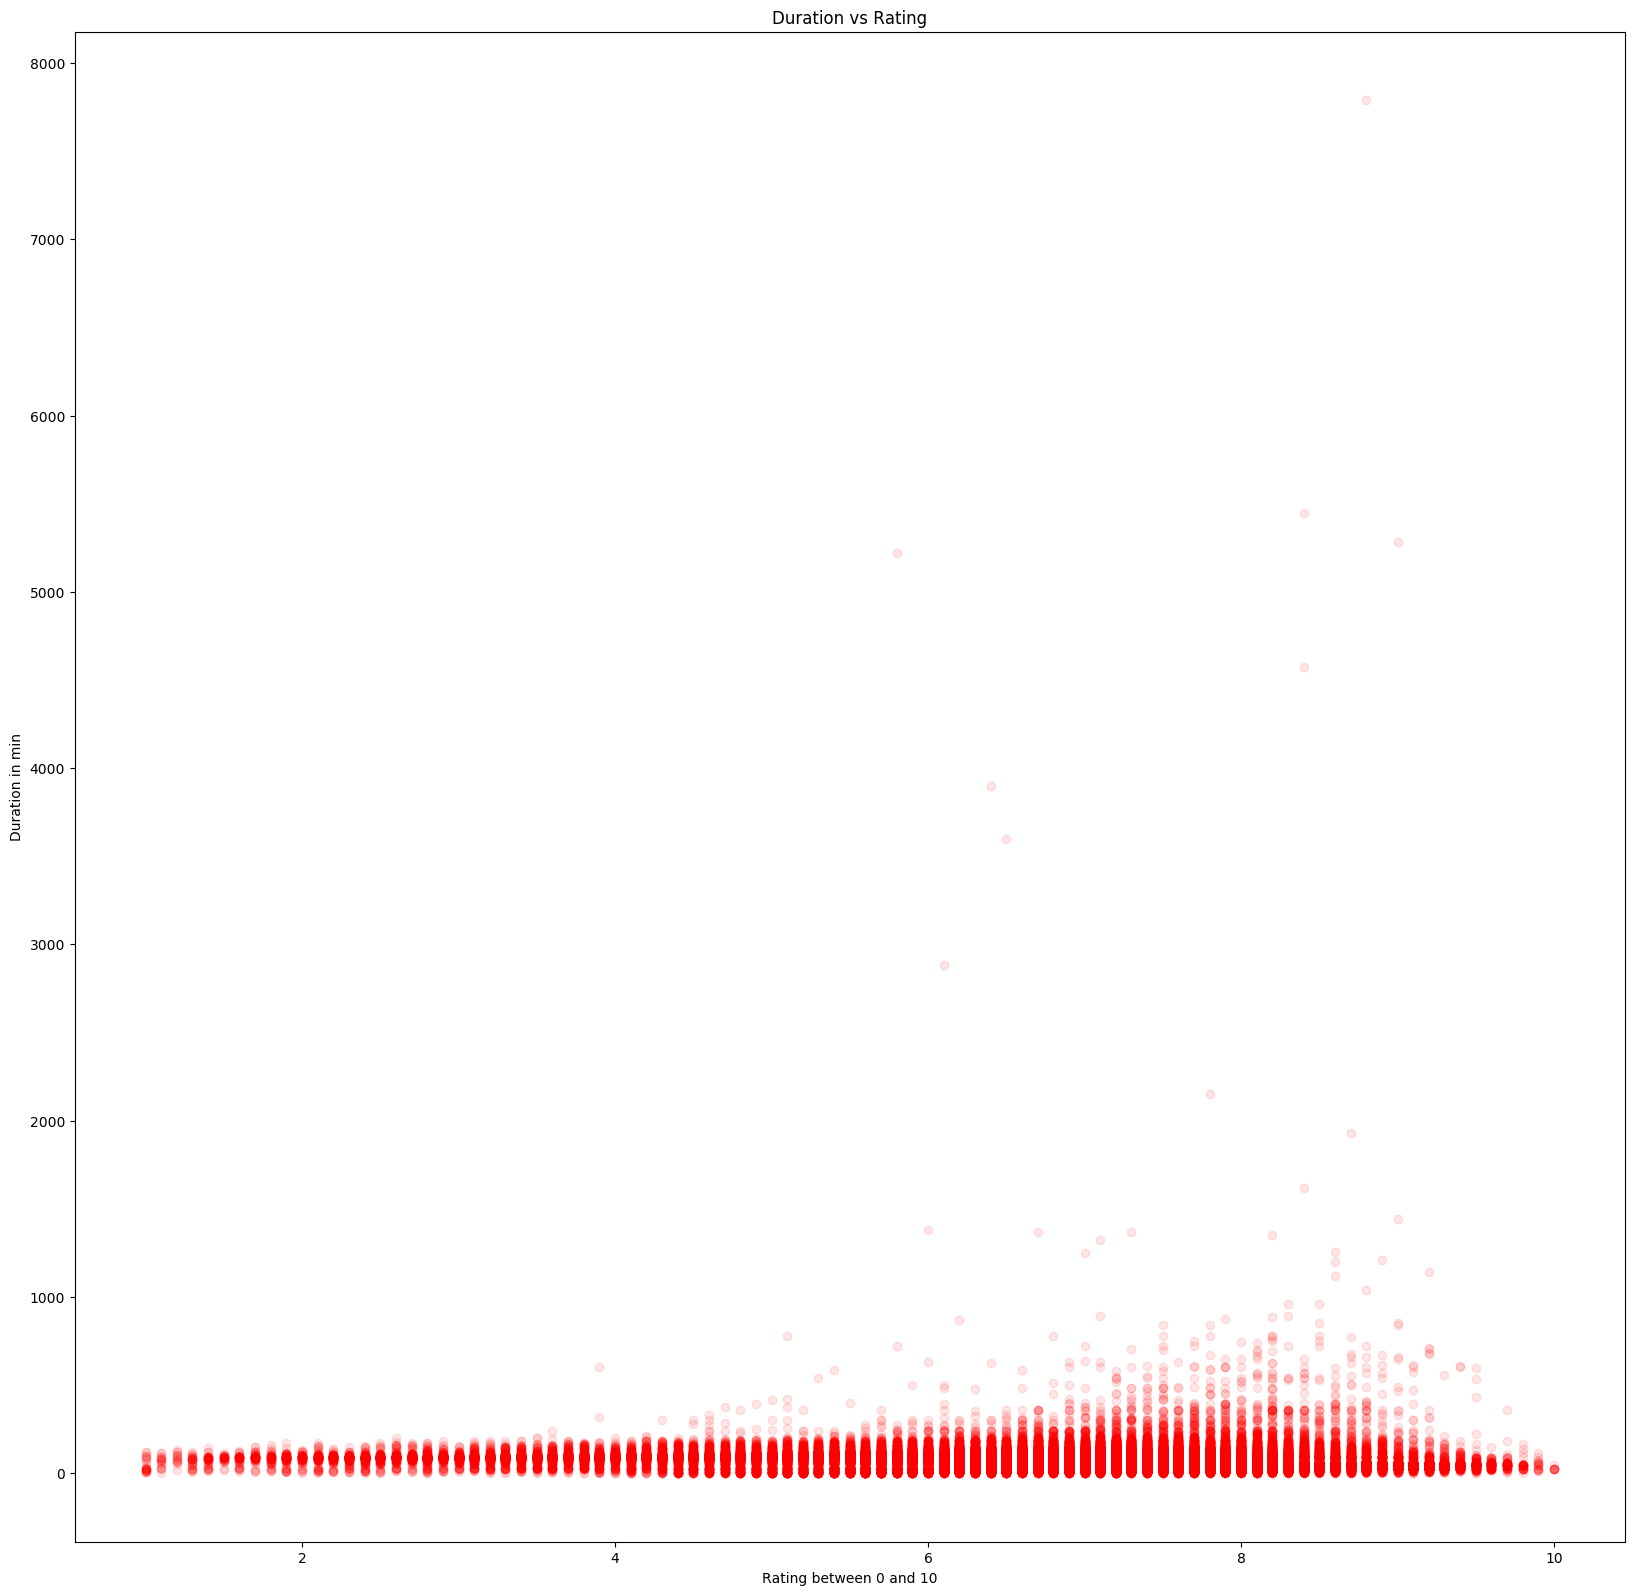

In [21]:
fig = plt.figure(figsize=(20, 20), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(y=durations, x=ratings, alpha=0.1, c='red')
ax.set_ylabel("Duration in min")
ax.set_xlabel("Rating between 0 and 10")
ax.set_title("Duration vs Rating")
fig

There are some ridiculously long movies

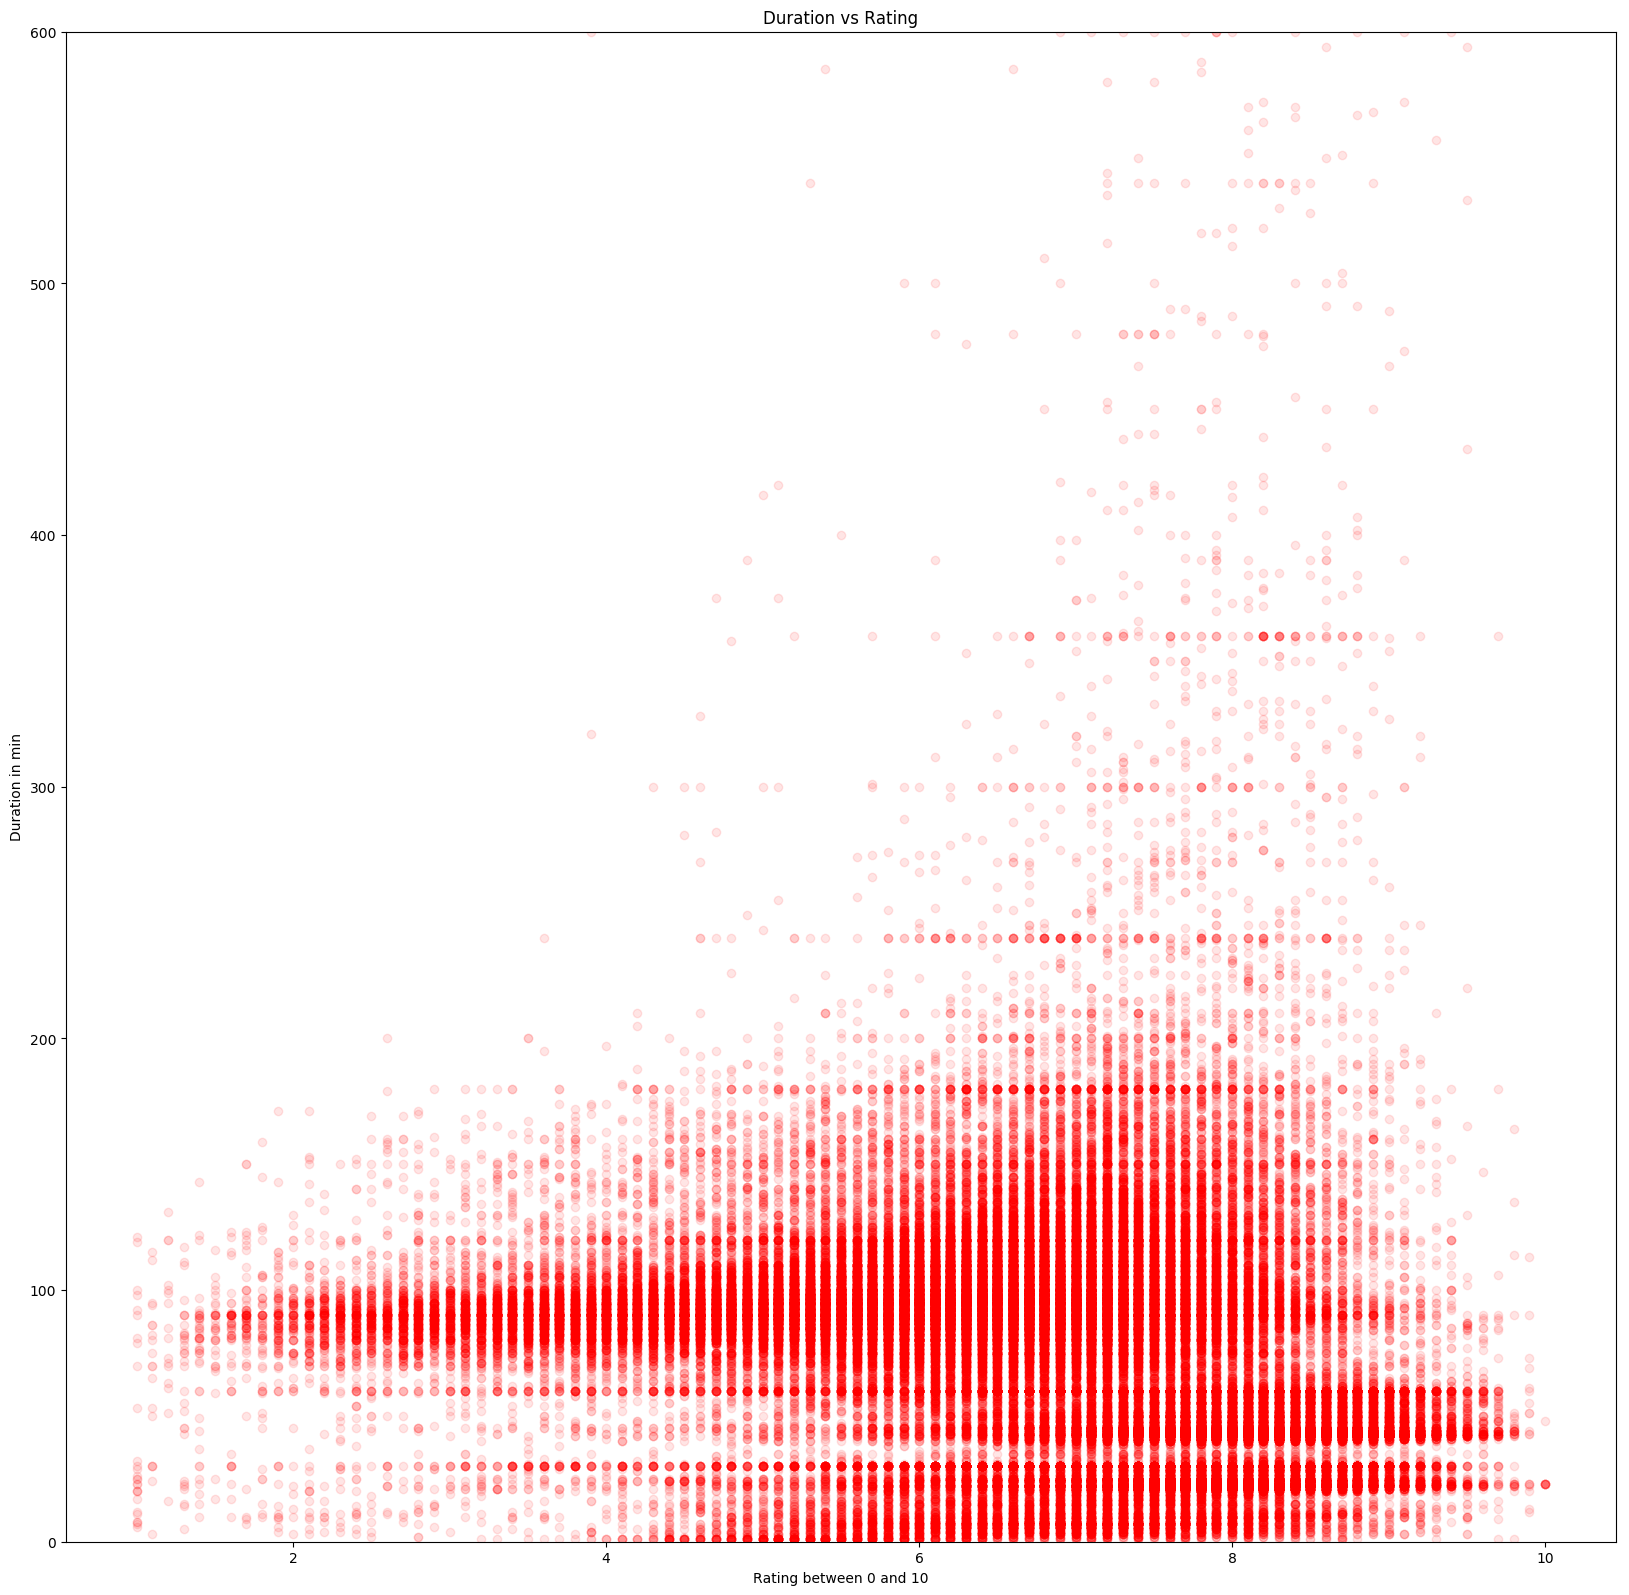

In [22]:
ax.set_ylim(0, 600)  # 10h maybe?
fig

### Budget vs. Rating

In [32]:
budget_gen = extract.get_businesses("../../database/selection/business.list")
rating_gen = extract.get_ratings("../../database/selection/ratings.list")

# Combine both lists
combined = extract.combine_generator(budget_gen, rating_gen)

In [44]:
from currency_converter import CurrencyConverter
from datetime import datetime
import re
c = CurrencyConverter(fallback_on_wrong_date=True, fallback_on_missing_rate=True)

budgets = []
ratings = []
counter = 0
for data in combined.items():
    if data[1][0].bt and data[1][0].bt is not ['']:
        counter = counter + 1
        budget = sorted(data[1][0].bt)[-1].replace(',','') # Take the highest budget
        budget = budget[:3] + ' ' + re.search(r'(\d+) .*', budget[4:]).group(1)

        # We have to convert the currencies first.. Just taking the ones that currency data is available
        if budget[:3] != 'USD':
            try:
                budget_conversed = c.convert(float(budget[4:]), budget[:3], 'USD', date=datetime(data[0].year, 1, 1))
                budgets.append(budget_conversed)  
                ratings.append(data[1][1][1])
                if budgets and budgets[-1] > 7e10:
                    print(budgets[-1])
                    print(data[0])
            except:
                pass
        else:
            budgets.append(float(budget[4:]))
            ratings.append(data[1][1][1])

73458460058.96095
Movie(title='"Dil Boley Oberoi"', year=2017, counter=None, episode=None, tag=None)


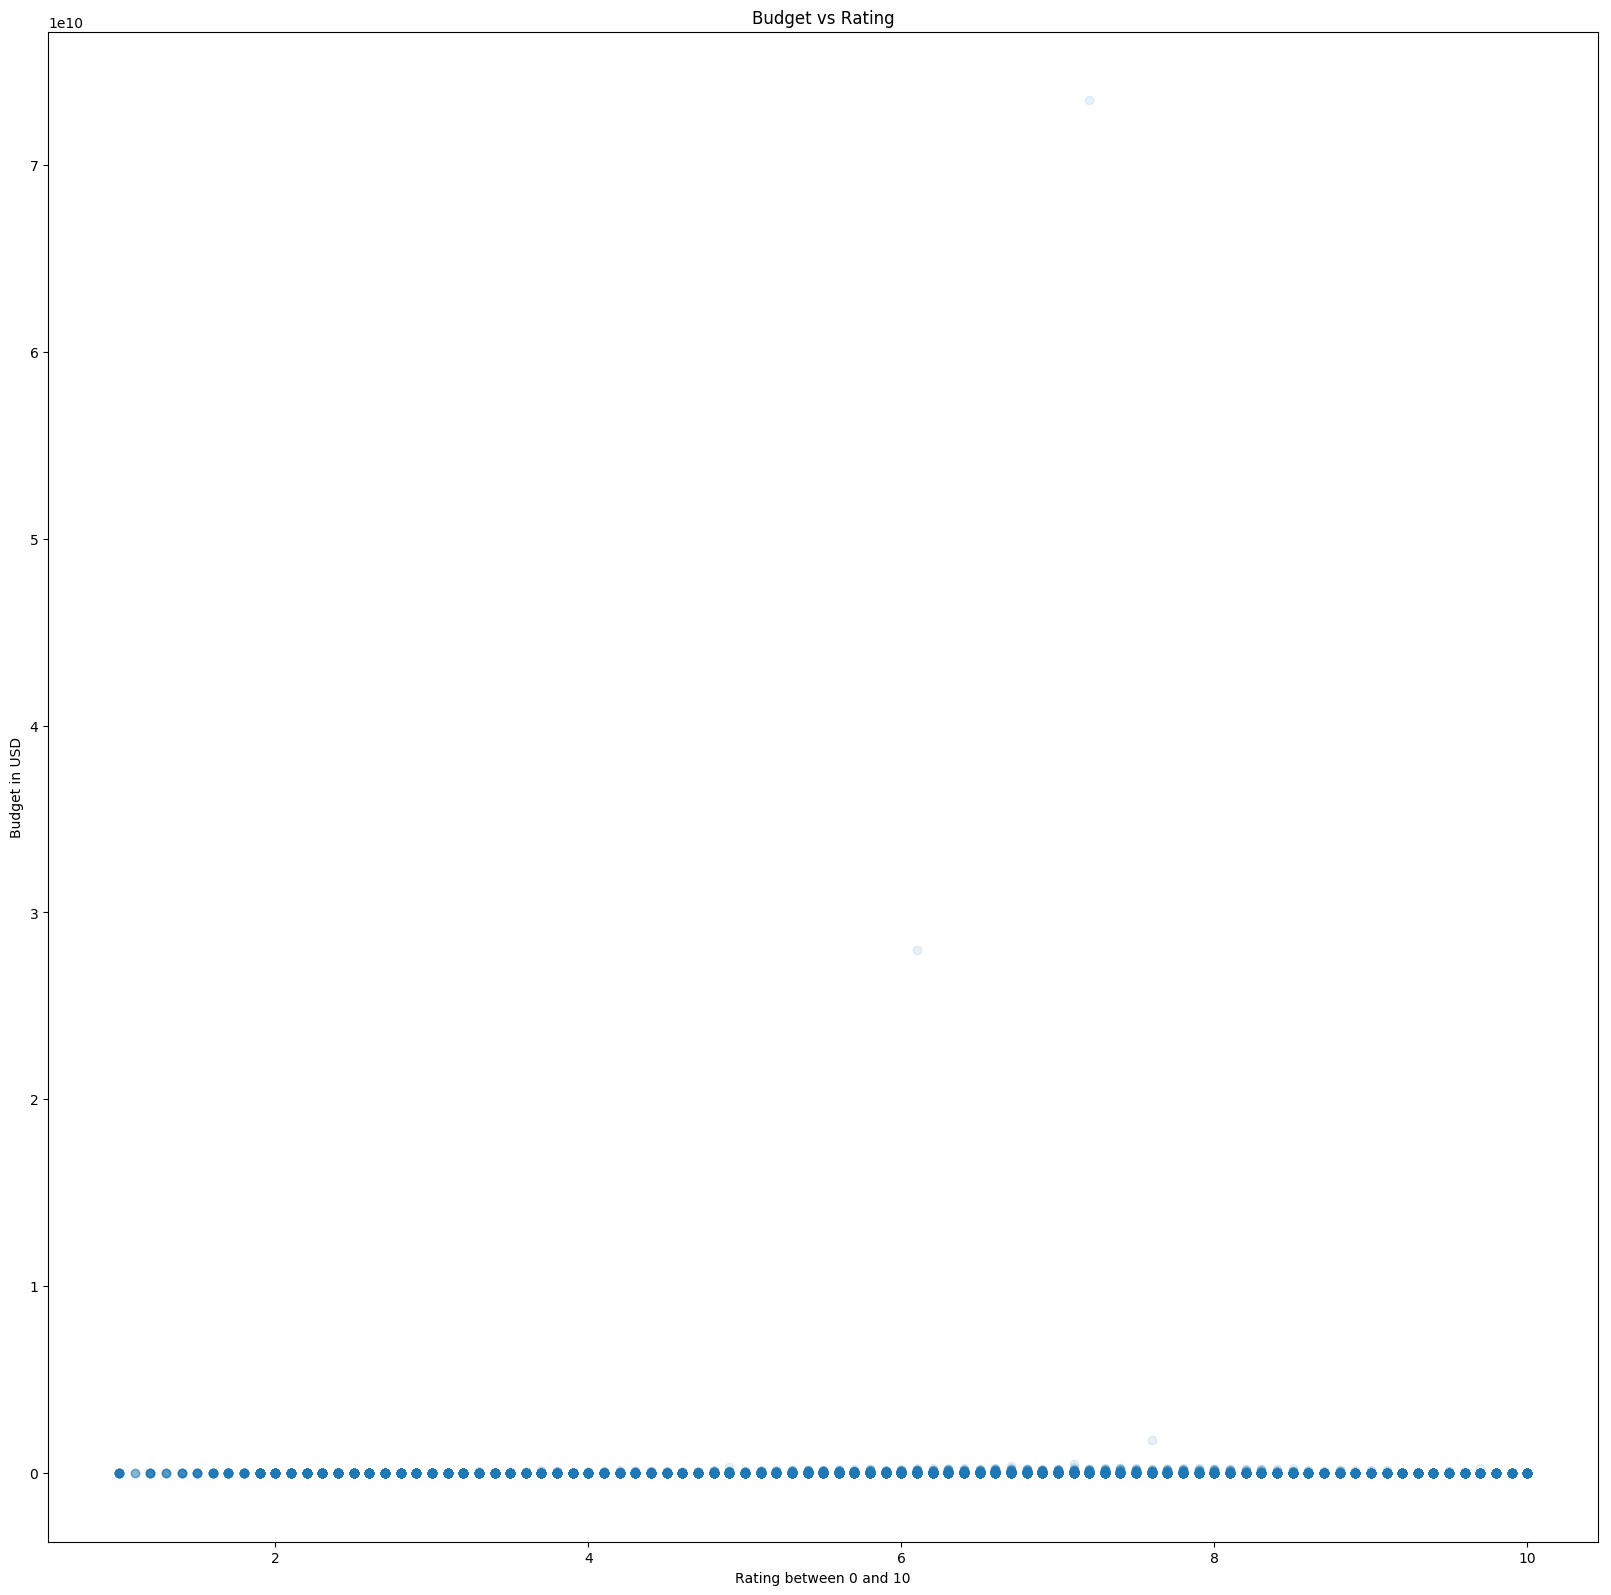

In [37]:
fig = plt.figure(figsize=(20, 20), dpi=100)
ax = fig.add_subplot(111)
ax.scatter(y=budgets, x=ratings, alpha=0.1)
ax.set_ylabel("Budget in USD")
ax.set_xlabel("Rating between 0 and 10")
ax.set_title("Budget vs Rating")
fig

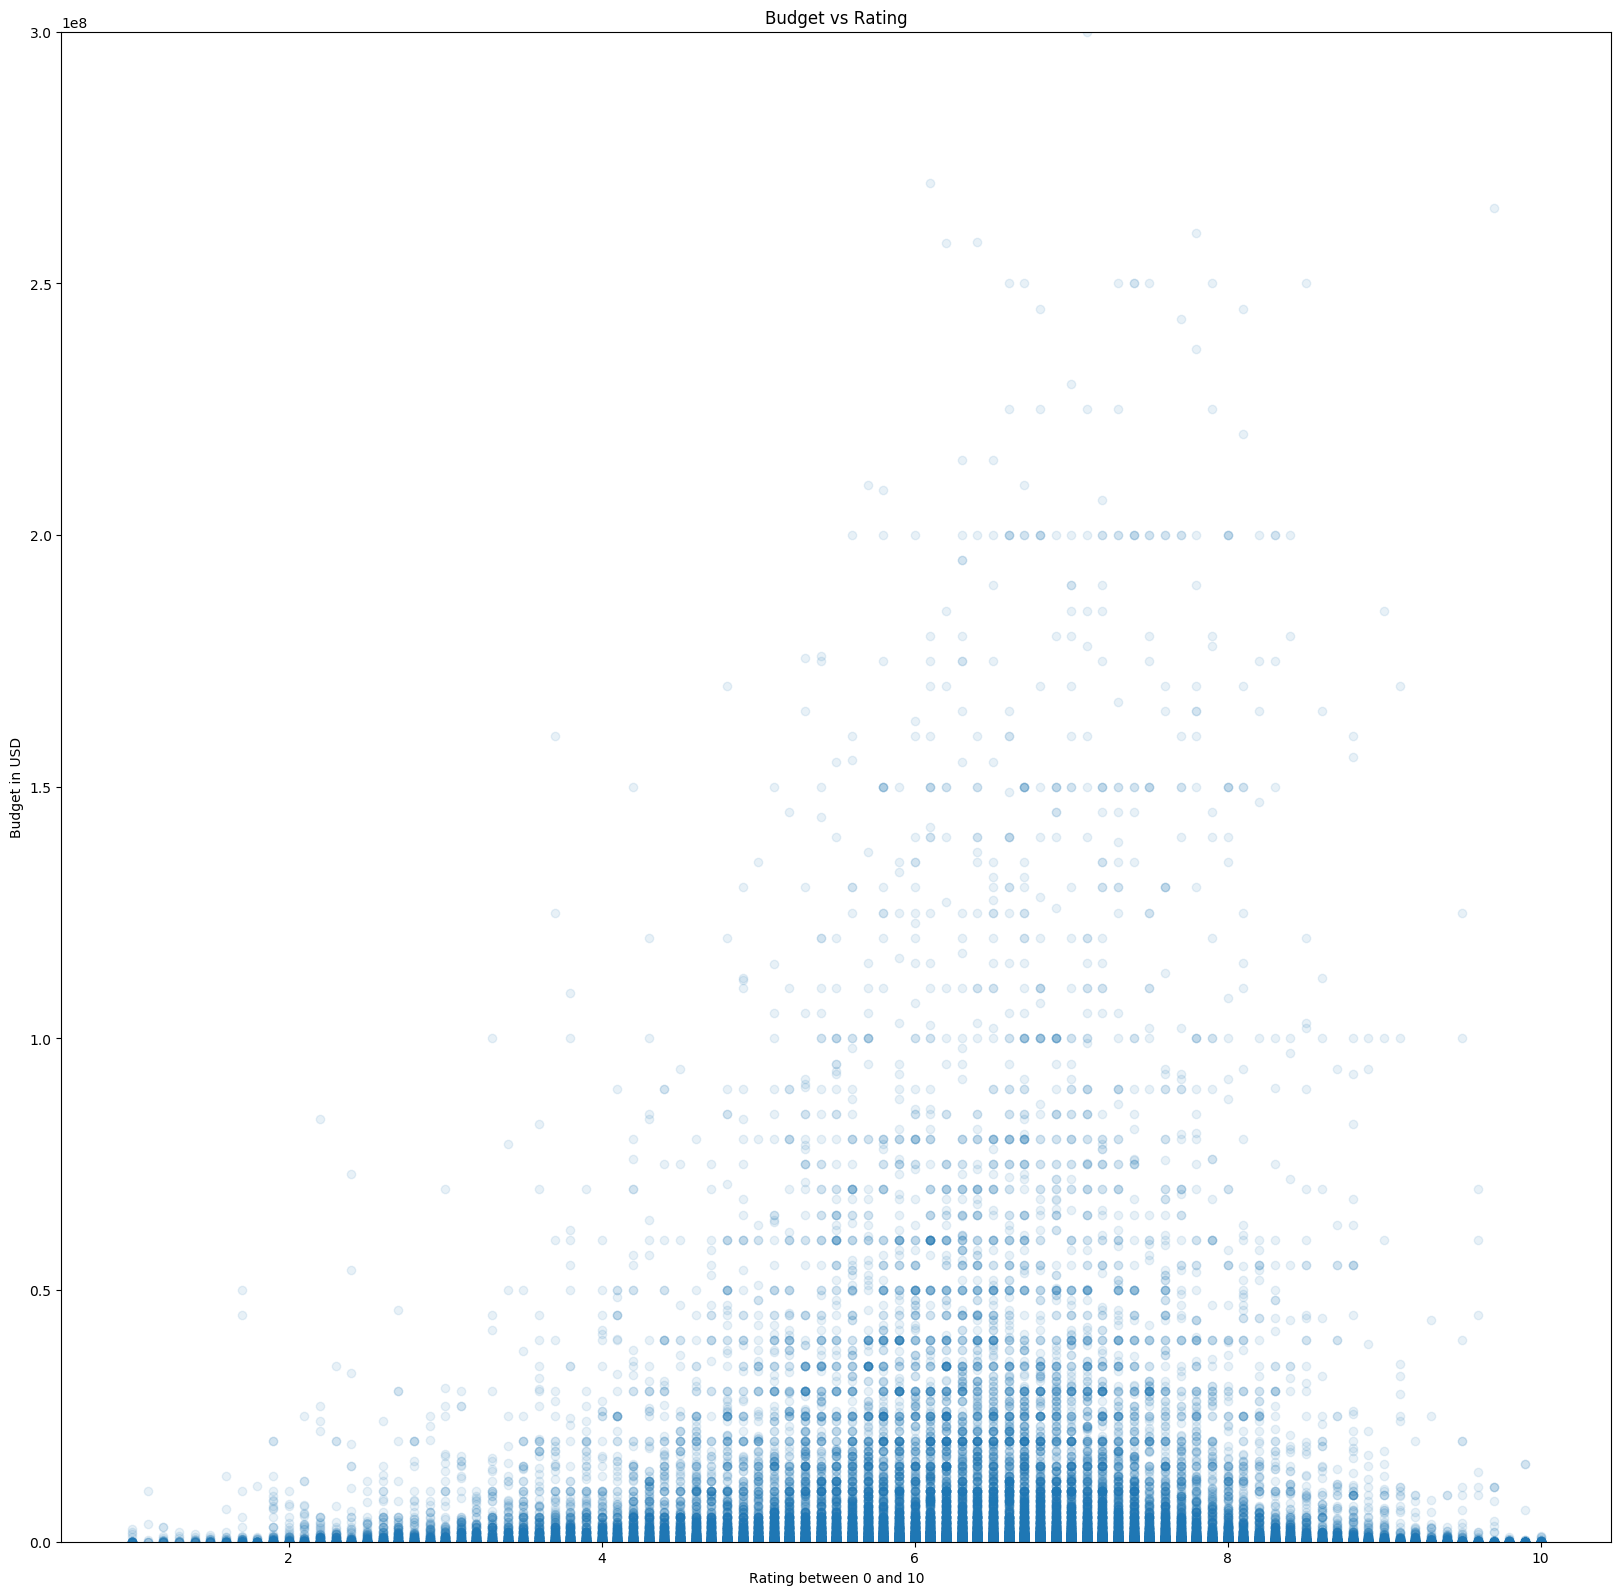

In [47]:
ax.set_ylim(0, 300000000)  # 10h maybe?
fig

## Genres

Let's look at the genres next. Is there a prominent one aka. how many movies are in which genre? What's the average rating per genre?

In [26]:
genre_gen = extract.get_genres("../../database/selection/genres.list")
rating_gen = extract.get_ratings("../../database/selection/ratings.list")

# Combine both lists
combined = extract.combine_generator(genre_gen, rating_gen)

In [27]:
from collections import defaultdict as dd
genres = dd(int)
ratings = dd(float)
for data in combined.values():
    for genre in data[0]:
        genres[genre] = genres[genre] + 1
        ratings[genre] = ratings[genre] + data[1][1]
print(genres)

defaultdict(<class 'int'>, {'Documentary': 60978, 'Reality-TV': 5985, 'Horror': 25030, 'Short': 103312, 'Thriller': 33612, 'Drama': 144833, 'Comedy': 108452, 'Sci-Fi': 16851, 'Romance': 37660, 'Biography': 10102, 'Crime': 28313, 'Family': 25965, 'Game-Show': 2260, 'Music': 16750, 'Adventure': 22323, 'War': 8916, 'Fantasy': 17324, 'Sport': 7595, 'News': 2478, 'Animation': 26293, 'Action': 35437, 'Mystery': 15477, 'Talk-Show': 2676, 'History': 10114, 'Musical': 8637, 'Western': 6536, 'Adult': 14130, 'Lifestyle': 1, '(#1.41)}\tCrime': 1, 'Film-Noir': 733, 'Hardcore': 1, 'Sex': 1})


In [28]:
fig = plt.figure(figsize=(20, 20), dpi=100)
ax = fig.add_subplot(211)
x_label = list(genres.keys())
x_val = range(len(x_label))
y_val = list(genres.values())
ax.bar(x_val, y_val, align='center')
ax.set_xticks(x_val)
ax.set_xticklabels(x_label, rotation=90)
ax.set_ylabel("Number of movies")
ax.set_xlabel("Genres")
ax.set_title("Movies per Genre")

[7.157343632129518, 6.22569757727652, 5.741182580902955, 6.903606551029842, 6.165071998095929, 6.647244757755282, 6.491356544830792, 6.359272446739073, 6.4455018587362005, 7.081825381112652, 6.425532440928236, 6.69712305025992, 6.008230088495565, 7.163456716417915, 6.6007391479640445, 6.806202332884698, 6.694781805587673, 6.9363528637261265, 6.788256658595647, 6.7031719469059485, 6.2858819877529495, 6.611203721651469, 6.333968609865483, 7.125173027486638, 6.560067152946636, 6.250367197062408, 6.50479830148623, 6.9, 8.0, 6.704092769440656, 6.3, 6.3]


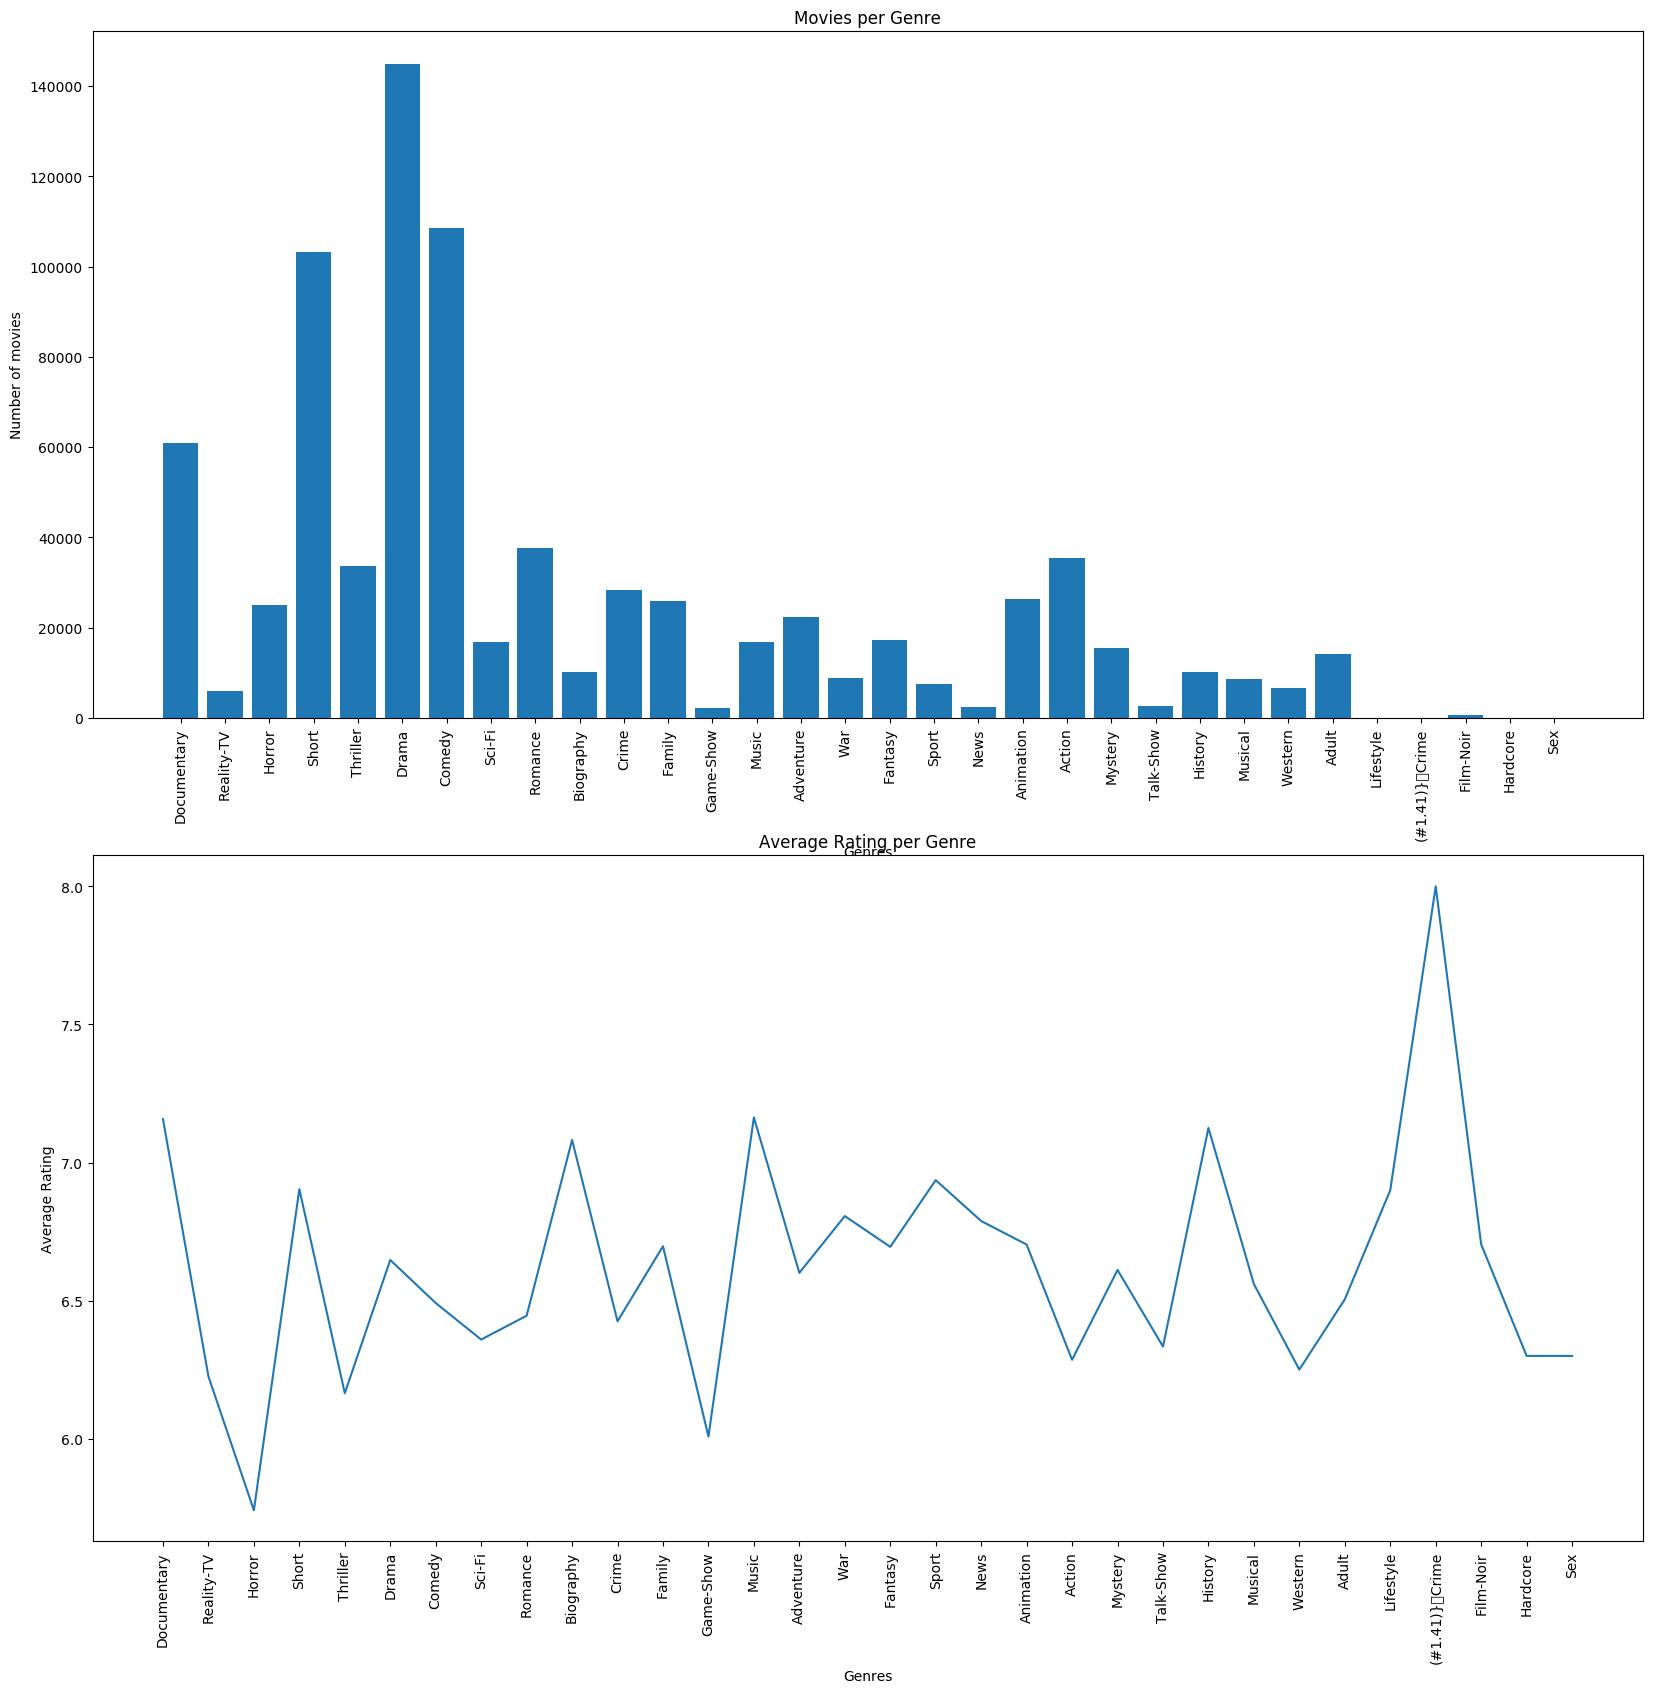

In [29]:
avg_rating = []
for data in ratings.items():
    avg_rating.append(data[1] / genres[data[0]])
    
print(avg_rating)
    
ax2 = fig.add_subplot(212)
ax2.plot(x_val, avg_rating)
ax2.set_xticks(x_val)
ax2.set_xticklabels(x_label, rotation=90)
ax2.set_ylabel("Average Rating")
ax2.set_xlabel("Genres")
ax2.set_title("Average Rating per Genre")
fig

## Conclusion

In this short analysis I could not find any significant indicator to predict a movies rating. Though when in doubt, make it long and probably not horror.

With more time at hand, the quality of the extraction module could be improved. Furthermore I only explored a fraction of possible relationships between different factors. Taking these in as well we could try to build a prediction system for good movies.

In this project I learned a lot about data sanitation and regex matching which took most of my time.The benefit of a good documentation became self evident after hours of debugging and rereading my own code.In this regard good structuring of the code became important.

Additionally I could work a lot with the matplotlib to create visualizations, the jupyter notebook and the python language itself.